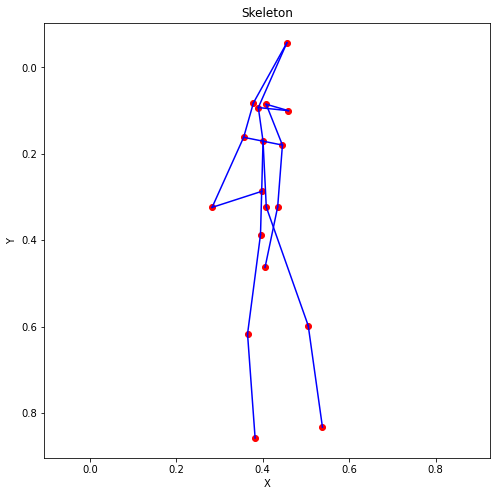

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Keypoints set 1
keypoints_1 = np.array([
  [0.38987788558006287, 0.09318923950195312],
  [0.4007920026779175, 0.1710333377122879],
  [0.4456433057785034, 0.18003179132938385],
  [0.43465864658355713, 0.32293879985809326],
  [0.40545913577079773, 0.4629712998867035],
  [0.35594066977500916, 0.16203488409519196],
  [0.2829365134239197, 0.32420623302459717],
  [0.39874133467674255, 0.28675147891044617],
  [0.408297061920166, 0.32334521412849426],
  [0.5053321123123169, 0.5977970361709595],
  [0.5382518172264099, 0.8326776027679443],
  [0.3949339687824249, 0.3872723877429962],
  [0.3649390935897827, 0.6170563697814941],
  [0.3824518918991089, 0.8577886819839478],
  [0.45954033732414246, 0.10044724494218826],
  [0.4560677707195282, -0.05684736371040344],
  [0.40804699063301086, 0.08554968237876892],
  [0.37856265902519226, 0.08237215876579285]
  ]) # Replace with the coordinates of keypoints set 1

# Keypoints set 2
keypoints_2 = np.array([
   [0.42277307732336017, 0.10302229485475745],
   [0.3988911074637411, 0.17969645004870471],
   [0.4692262180724089, 0.17023224945965237],
   [0.47636185264517783, 0.3051350618133535],
   [0.4278851861533787, 0.4607300081665753],
   [0.3633266894833621, 0.18879143836264772],
   [0.3029855308115642, 0.3201582111373727],
   [0.38979935357017104, 0.27146991482152494],
   [0.44358360249370643, 0.3426196761961754],
   [0.5186945842794483, 0.6745361931766742],
   [0.530970763733766, 0.834561413495417],
   [0.43196132345085947, 0.4051962643066617],
   [0.3579139221501141, 0.6540735272564187],
   [0.3874664563575157, 0.8311225216361826],
   [0.46768137484247485, 0.10358459101142375],
   [0.4592455112729007, -0.03216377538537968],
   [0.42617383090872957, 0.09308822028117553],
   [0.39076110948678944, 0.09632950887666758]
   ])  # Replace with the coordinates of keypoints set 2

# Edge index
edge_index = np.array([
    [1, 1, 2, 3, 5, 6, 1, 8, 9, 1, 11, 12, 1, 0, 14, 0, 15, 2, 5],
    [2, 5, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 16, 15, 17, 16, 17],
])

# Plotting the skeleton
plt.figure(figsize=(8, 8))

# Plot keypoints set 1
plt.scatter(keypoints_1[:, 0], keypoints_1[:, 1], color='red')
for i in range(edge_index.shape[1]):
    x = [keypoints_1[edge_index[0, i], 0], keypoints_1[edge_index[1, i], 0]]
    y = [keypoints_1[edge_index[0, i], 1], keypoints_1[edge_index[1, i], 1]]
    plt.plot(x, y, color='blue')

# Plot keypoints set 2
# plt.scatter(keypoints_2[:, 0], keypoints_2[:, 1], color='green')
# for i in range(edge_index.shape[1]):
#     x = [keypoints_2[edge_index[0, i], 0], keypoints_2[edge_index[1, i], 0]]
#     y = [keypoints_2[edge_index[0, i], 1], keypoints_2[edge_index[1, i], 1]]
#     plt.plot(x, y, color='orange')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Skeleton')
plt.axis('equal')
plt.gca().invert_yaxis() 
plt.show()


In [3]:
keypoints_2 - keypoints_1

array([[ 0.03369499,  0.00121518],
       [-0.01824854,  0.0177686 ],
       [-0.03179515,  0.00268271],
       [ 0.03135479,  0.01734599],
       [ 0.08663342, -0.00097512],
       [ 0.05470333,  0.02047869],
       [ 0.10306494,  0.01512037],
       [ 0.10411695,  0.03503413],
       [-0.00443283,  0.04839544],
       [ 0.05314278,  0.02761041],
       [-0.07297749,  0.05055384],
       [-0.00511783,  0.03774825],
       [ 0.05247146,  0.03044494],
       [-0.1168537 , -0.05168803],
       [ 0.05336763,  0.00557762],
       [ 0.06101183,  0.016959  ],
       [ 0.04190375,  0.0118581 ],
       [ 0.01293875, -0.00360583]])

In [2]:
import torch.nn.functional as F
import torch
import torch.nn as nn

In [3]:
loss = nn.CosineSimilarity(dim=0)

In [4]:
loss(torch.Tensor(keypoints_1), torch.Tensor(keypoints_2))

tensor([0.9781, 0.9900])

In [5]:
l = nn.L1Loss()
l(torch.Tensor(keypoints_1), torch.Tensor(keypoints_2))

tensor(0.0902)

In [6]:
np.sum(abs(keypoints_1 - keypoints_2))/36

0.09015552542450155

In [7]:
torch.norm(torch.Tensor(keypoints_1)- torch.Tensor(keypoints_2), p=1, dim=0)

tensor([2.1813, 1.0643])